# Python Natural Language Toolkit (NLTK) Notebook
We first need some import.
Some of these imports will be commented, because are not always required, like the downloads.

In [1]:
import nltk

# nltk.download("stopwords")
# nltk.download("punkt")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")
# nltk.download("book")

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

In [2]:

# This is our test string, it will be useful to test the algorithms.
# All the algorithms will be tested on this string.
example_string = """All we have to decide is what to do with the time that is given to us.
There are other forces at work in this world, Frodo, besides the will of evil."""

## Tokenization
Tokenization is the process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens.

In [3]:
# Stopwords are the words that are filtered out before or after processing of natural language data.
stop_words = set(stopwords.words("english"))

# Tokenize by sentences
sentences = sent_tokenize(example_string)

# Tokenize by words
words = word_tokenize(example_string)

# Filtering based on the english stopwords.
# This filtering, is actually remove I and Not words, those are important sometimes, so keep that in mind.
filtered_words = [word for word in words if word.casefold() not in stop_words]

# print("Filtered")
# print(filtered_words)

## Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form.

In [4]:
stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(filtered_word) for filtered_word in filtered_words]

# print("\nStemmed words")
# print(stemmed_words)

## Tagging Parts of Speech
Part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context — i.e., its relationship with adjacent and related words in a phrase, sentence, or paragraph.

In [5]:
# This is an helper function to get more information about the tags.
# nltk.help.upenn_tagset()
pos_tag = nltk.pos_tag(stemmed_words)

# print("\nParts of Speech array")
# print(pos_tag)

## Lemmatizing
Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

In [6]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# print("\nLemmatized words")
# print(lemmatized_words)

# print("\nLemmatized the word worst, example case")
# # treated as noun by adding the parameter, default behavior
# print(lemmatizer.lemmatize("worst"))
# # treated as an adjective by adding the parameter
# print(lemmatizer.lemmatize("worst", pos="a"))

## Chunking
Chunking is the process of extracting phrases from unstructured text. This is a complementary process for the tokenization. You basically chunks by phrases.

In [7]:

# We start by tokenizing the string and then tagging the words with parts of speech.
words_in_lotr_quote = word_tokenize(example_string)
example_pos_tags = nltk.pos_tag(words_in_lotr_quote)

# print("\nlotr_pos_tags")
# print(lotr_pos_tags)

# Now, we create a chunk grammar, which is a combination of rules on how sentences should be chunked.
# It often uses regular expressions, or regexes.

# The following grammar will:
# Start with an optional (?) determiner ('DT')
# Can have any number (*) of adjectives (JJ)
# End with a noun (<NN>)
chunk_grammar = "NP: {<DT>?<JJ>*<NN>}"

chunk_parser = nltk.RegexpParser(chunk_grammar)
tree = chunk_parser.parse(example_pos_tags)
# tree.draw()

## Chinking
Chinking is the process of removing a sequence of tokens from a chunk.

In [8]:
# The following grammar will:
# {<.*>+} patterns you want to include in you chunks, <.*>+ means any token
# }<JJ>{ patterns you want to exclude in you chunks, <JJ> means adjectives
chink_grammar = """
Chunk: {<.*>+}
}<JJ>{"""

chunk_chink_parser = nltk.RegexpParser(chink_grammar)
tree = chunk_chink_parser.parse(example_pos_tags)
# tree.draw()

## Using Named Entity Recognition
Named entities are noun phrases that refer to specific locations, people, organizations, and so on

In [9]:
tree = nltk.ne_chunk(example_pos_tags)
# tree.draw()

def extract_ne(quote):
    words = word_tokenize(quote, language="english")
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )


extracted_entities = extract_ne(example_string)

# print(extracted_entities)

## Using a Concordance
A concordance is a listing of words in order of appearance in a text, with line numbers.

In [10]:
from nltk.book import *

# text8.concordance("man")
# print("")
# text8.concordance("woman")

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Dispersion Plot
A dispersion plot is a graph showing the location of a word in the text.

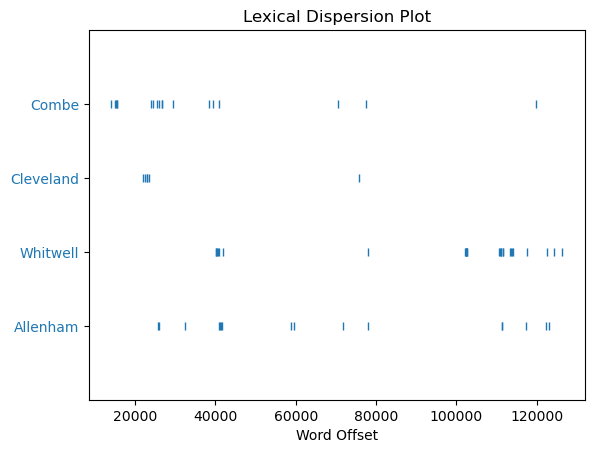

In [11]:
# text8.dispersion_plot(
#     ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]
# )
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

## Frequency Distribution
A frequency distribution counts the number of times each outcome of an experiment occurs.

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632)]


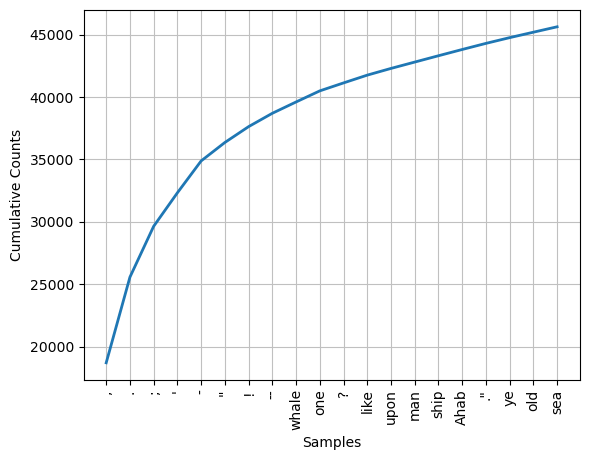

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
text_case = text1
frequency_distribution = FreqDist(text_case)

# This will print the 20 most common words in the text.
print(frequency_distribution.most_common(20))

# This create a list of all of the words in text8 that aren’t stop
meaningful_words = [
    word for word in text_case if word.casefold() not in stop_words
]
frequency_distribution = FreqDist(meaningful_words)
# print(frequency_distribution.most_common(20))
frequency_distribution.plot(20, cumulative=True)

## Collocations
Collocations are expressions of multiple words which commonly co-occur.

In [13]:
text8.collocations()
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build
